In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('/content/final_dataset.csv')

# Explore the data
print(df.head())
print(df.info())
print(df.describe())


       Weight    Height        BMI  Gender  Age      BMIcase  \
0   92.085190  1.760250  29.719488  Female   59  over weight   
1   61.089124  1.595499  23.997776  Female   25       normal   
2   82.454037  1.816538  24.987499  Female   50       normal   
3  101.713306  1.790696  31.720047  Female   62        obese   
4   99.609527  1.969726  25.673756    Male   57  over weight   

   Exercise Recommendation Plan  
0                             5  
1                             4  
2                             4  
3                             6  
4                             5  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Weight                        5000 non-null   float64
 1   Height                        5000 non-null   float64
 2   BMI                           5000 non-null   float64
 3   Gende

# DATA PREPROCRSSING

In [13]:
print(df['BMIcase'].value_counts())

# Check for missing values
print(df.isnull().sum())


BMIcase
normal               1467
over weight          1214
severe obese          835
obese                 830
mild thinness         272
sever thinness        226
moderate thinness     156
Name: count, dtype: int64
Weight                          0
Height                          0
BMI                             0
Gender                          0
Age                             0
BMIcase                         0
Exercise Recommendation Plan    0
dtype: int64


# PRCOESSING STEPS

In [14]:
# Drop BMI as it's derived from Weight and Height (to avoid data leakage)
df = df.drop('BMI', axis=1)

# Encode categorical variables
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['BMIcase'] = le.fit_transform(df['BMIcase'])

# Feature scaling
scaler = StandardScaler()
features = ['Weight', 'Height', 'Age'] # Removed 'Exercise Recommendation Plan'
df[features] = scaler.fit_transform(df[features])

# Split data into features and target
X = df.drop(['BMIcase', 'Exercise Recommendation Plan'], axis=1) # Removed 'Exercise Recommendation Plan' from features
y = df['BMIcase']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Exploratory Data Analysis

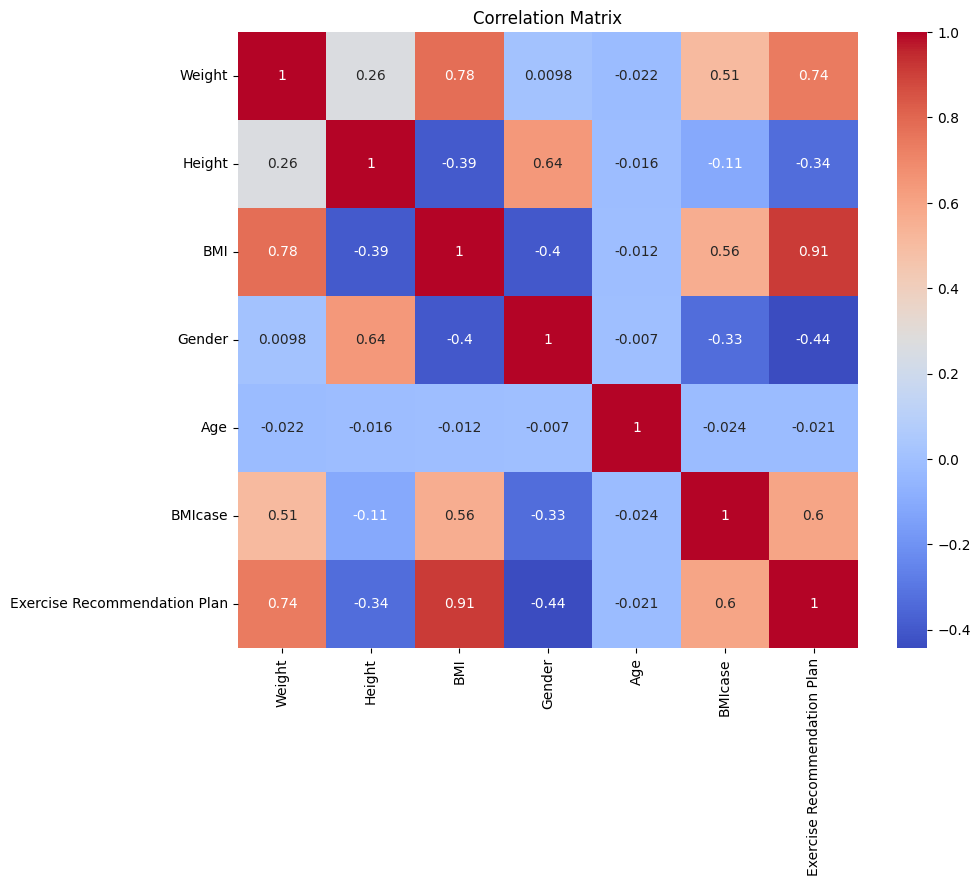

In [15]:
# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()



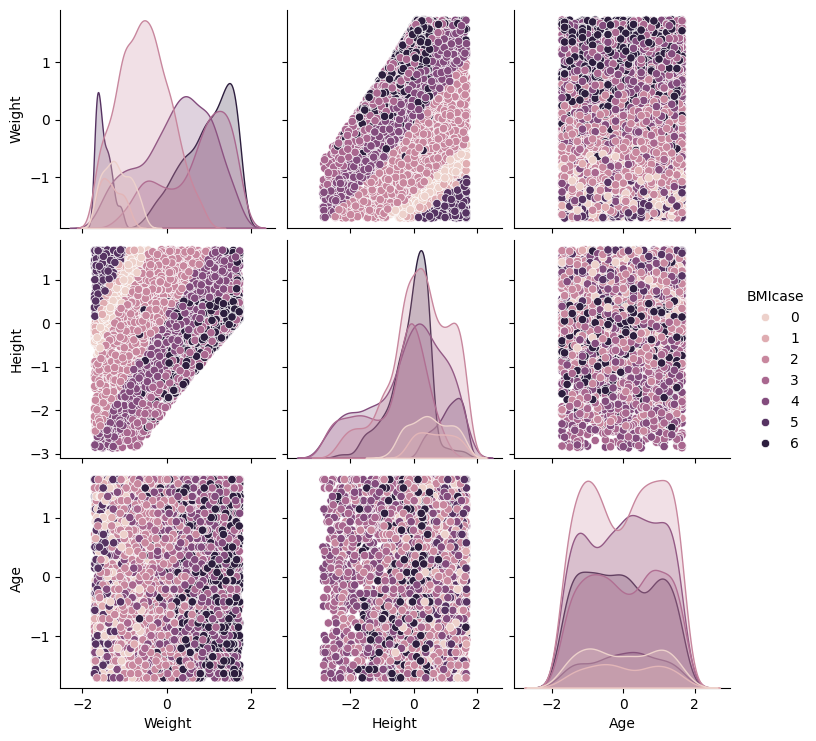

In [16]:
# Pairplot of key features
sns.pairplot(df[['Weight', 'Height', 'Age', 'BMIcase']], hue='BMIcase')
plt.show()


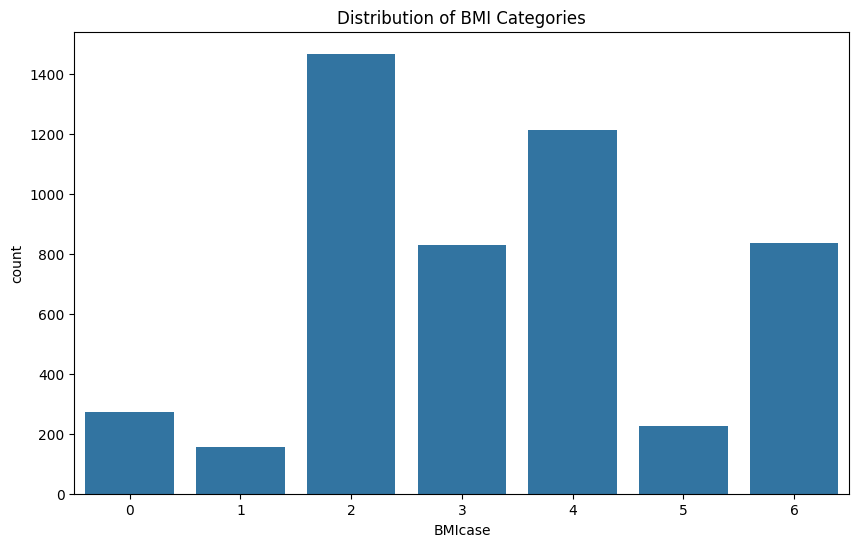

In [17]:

# Distribution of BMI categories
plt.figure(figsize=(10, 6))
sns.countplot(x='BMIcase', data=df)
plt.title('Distribution of BMI Categories')
plt.show()

# Feature Importance

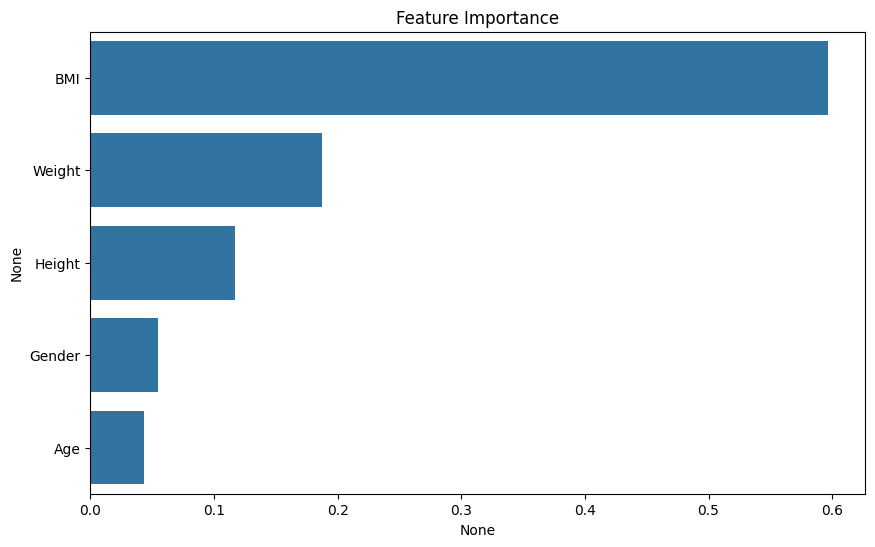

In [22]:
feature_imp = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.title('Feature Importance')
plt.show()

# Machine Learning Models

# RandomForestClassifier

In [18]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Classifier:")
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

Random Forest Classifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        69
           1       1.00      1.00      1.00        58
           2       0.99      1.00      1.00       439
           3       0.77      0.78      0.77       250
           4       0.93      0.96      0.94       367
           5       1.00      1.00      1.00        69
           6       0.69      0.64      0.66       248

    accuracy                           0.89      1500
   macro avg       0.91      0.91      0.91      1500
weighted avg       0.89      0.89      0.89      1500

Accuracy: 0.8926666666666667


# Support Vector Machine (SVM)

In [19]:
svm = SVC(kernel='rbf', random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

print("\nSupport Vector Machine:")
print(classification_report(y_test, y_pred_svm))
print("Accuracy:", accuracy_score(y_test, y_pred_svm))


Support Vector Machine:
              precision    recall  f1-score   support

           0       0.58      0.97      0.72        69
           1       0.00      0.00      0.00        58
           2       0.99      1.00      0.99       439
           3       0.74      0.72      0.73       250
           4       0.87      1.00      0.93       367
           5       0.88      1.00      0.94        69
           6       0.68      0.54      0.60       248

    accuracy                           0.84      1500
   macro avg       0.68      0.75      0.70      1500
weighted avg       0.80      0.84      0.82      1500

Accuracy: 0.836


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# LogisticRegression

In [20]:
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("\nLogistic Regression:")
print(classification_report(y_test, y_pred_lr))
print("Accuracy:", accuracy_score(y_test, y_pred_lr))


Logistic Regression:
              precision    recall  f1-score   support

           0       0.63      0.75      0.69        69
           1       0.87      0.22      0.36        58
           2       0.96      0.99      0.97       439
           3       0.81      0.74      0.77       250
           4       0.89      0.96      0.92       367
           5       0.82      1.00      0.90        69
           6       0.70      0.69      0.69       248

    accuracy                           0.85      1500
   macro avg       0.81      0.76      0.76      1500
weighted avg       0.85      0.85      0.84      1500

Accuracy: 0.85


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Models Accuracy Comparison

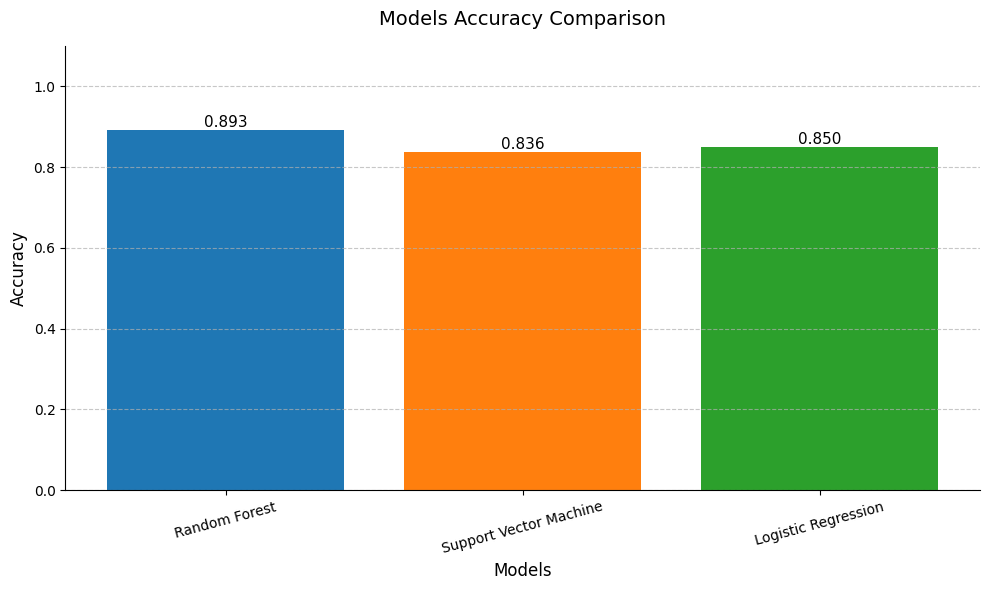

In [26]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score

# Calculate accuracy scores from your y_pred values
rf_accuracy = accuracy_score(y_test, y_pred_rf)
svm_accuracy = accuracy_score(y_test, y_pred_svm)
lr_accuracy = accuracy_score(y_test, y_pred_lr)

# Data for plotting
models = ['Random Forest', 'Support Vector Machine', 'Logistic Regression']
accuracies = [rf_accuracy, svm_accuracy, lr_accuracy]

# Create bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracies, color=['#1f77b4', '#ff7f0e', '#2ca02c'])

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.3f}',
             ha='center', va='bottom', fontsize=11)

# Customize the plot
plt.title('Models Accuracy Comparison', fontsize=14, pad=15)
plt.xlabel('Models', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.ylim(0, 1.1)  # Leave some space above the highest bar
plt.xticks(rotation=15)  # Rotate model names slightly for better readability

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()

<Figure size 1200x600 with 0 Axes>

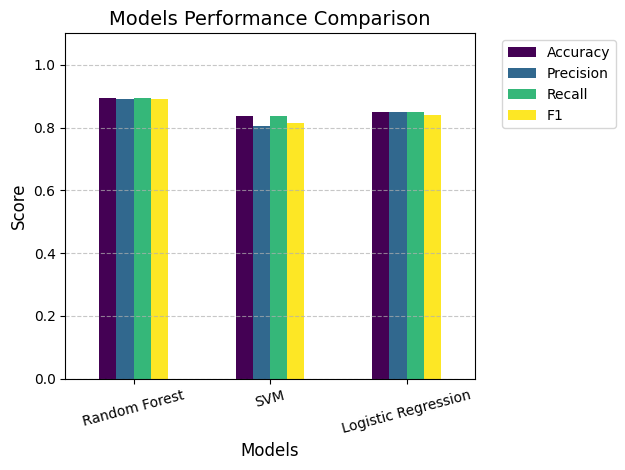

In [27]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate metrics for each model
metrics = {
    'Random Forest': {
        'Accuracy': accuracy_score(y_test, y_pred_rf),
        'Precision': precision_score(y_test, y_pred_rf, average='weighted'),
        'Recall': recall_score(y_test, y_pred_rf, average='weighted'),
        'F1': f1_score(y_test, y_pred_rf, average='weighted')
    },
    'SVM': {
        'Accuracy': accuracy_score(y_test, y_pred_svm),
        'Precision': precision_score(y_test, y_pred_svm, average='weighted'),
        'Recall': recall_score(y_test, y_pred_svm, average='weighted'),
        'F1': f1_score(y_test, y_pred_svm, average='weighted')
    },
    'Logistic Regression': {
        'Accuracy': accuracy_score(y_test, y_pred_lr),
        'Precision': precision_score(y_test, y_pred_lr, average='weighted'),
        'Recall': recall_score(y_test, y_pred_lr, average='weighted'),
        'F1': f1_score(y_test, y_pred_lr, average='weighted')
    }
}

# Convert to DataFrame for easier plotting
import pandas as pd
df_metrics = pd.DataFrame(metrics).T

# Plot
plt.figure(figsize=(12, 6))
df_metrics.plot(kind='bar', rot=15, colormap='viridis')
plt.title('Models Performance Comparison', fontsize=14)
plt.xlabel('Models', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.ylim(0, 1.1)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Deployment with Example

In [32]:
import pickle
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Original data processing pipeline
def process_data(df):
    # Drop BMI
    df = df.drop('BMI', axis=1)

    # Encode categoricals
    le_gender = LabelEncoder()
    le_bmi = LabelEncoder()
    df['Gender'] = le_gender.fit_transform(df['Gender'])
    y = le_bmi.fit_transform(df['BMIcase']) # Fit le_bmi here

    # Store label encoders
    with open('label_encoders.pkl', 'wb') as f:
        pickle.dump({'gender': le_gender, 'bmi': le_bmi}, f)

    # Features and target
    X = df.drop(['BMIcase', 'Exercise Recommendation Plan'], axis=1) # Also drop Exercise Recommendation Plan here


    return X, y

# Load data
df = pd.read_csv('final_dataset.csv')
X, y = process_data(df.copy()) # Use a copy to avoid modifying the original df


# Create preprocessing pipeline
numeric_features = ['Weight', 'Height', 'Age'] # Updated numeric features
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features)])

# Full pipeline with model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        n_estimators=200,
        max_depth=20,
        random_state=42))
])

# Train
pipeline.fit(X, y)

# Save model
with open('bmi_classifier.pkl', 'wb') as f:
    pickle.dump(pipeline, f)

# Example prediction function
def predict_bmi(weight, height, age, gender, exercise_plan):
    # Create input dataframe
    input_data = pd.DataFrame({
        'Weight': [weight],
        'Height': [height],
        'Age': [age],
        'Gender': [gender],
        'Exercise Recommendation Plan': [exercise_plan]
    })

    # Load model
    with open('bmi_classifier.pkl', 'rb') as f:
        model = pickle.load(f)

    # Load label encoders
    with open('label_encoders.pkl', 'rb') as f:
        encoders = pickle.load(f)

    # Encode gender if needed
    if isinstance(input_data['Gender'][0], str):
        input_data['Gender'] = encoders['gender'].transform(input_data['Gender'])

    # Drop 'Exercise Recommendation Plan' before prediction
    input_data = input_data.drop('Exercise Recommendation Plan', axis=1)


    # Predict
    pred = model.predict(input_data)

    # Decode prediction
    bmi_category = encoders['bmi'].inverse_transform(pred)[0]

    return bmi_category

# Example usage
print(predict_bmi(85, 1.75, 30, 'Female', 59))  # Should return a BMI category

over weight
